If we want to factor N=15 , we firstly choose a randon number x=7. We could use division method to verify that x is coprime to N.

In [13]:
def Division_method(a,b):
    if a<b:
        a,b=b,a
    while (a % b != 0):
        t = a % b
        a = b
        b = t
    return t
Division_method(7,15)==1

True

The outcome "True" means x is indeed coprime to N. Then we discuss the unitary operator U when x=7,N=15.
Because 15 can be represented by 4 bits in binary. So we use 2t+1=2*4+1=9 help qubits.

From the table above we could see all the outcomes in binary representation. We conclude the operator U as a circuit below:

dec: 1   bin: [0 0 0 1]   outcome: 7
dec: 2   bin: [0 0 1 0]   outcome: 14
dec: 3   bin: [0 0 1 1]   outcome: 6
dec: 4   bin: [0 1 0 0]   outcome: 13
dec: 5   bin: [0 1 0 1]   outcome: 5
dec: 6   bin: [0 1 1 0]   outcome: 12
dec: 7   bin: [0 1 1 1]   outcome: 4
dec: 8   bin: [1 0 0 0]   outcome: 11
dec: 9   bin: [1 0 0 1]   outcome: 3
dec: 10   bin: [1 0 1 0]   outcome: 10
dec: 11   bin: [1 0 1 1]   outcome: 2
dec: 12   bin: [1 1 0 0]   outcome: 9
dec: 13   bin: [1 1 0 1]   outcome: 1
dec: 14   bin: [1 1 1 0]   outcome: 8


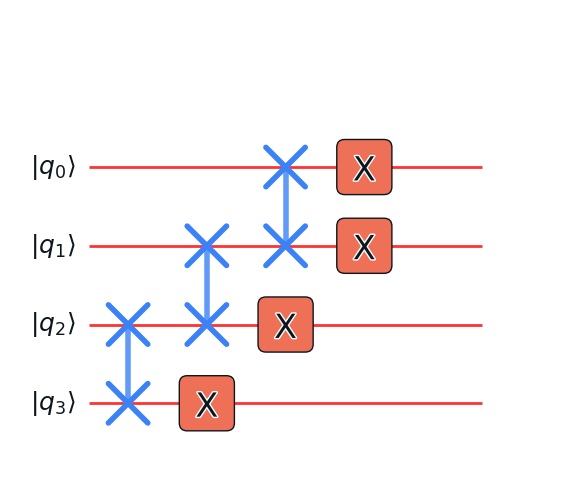

In [34]:
from quafu import QuantumCircuit,Task,simulate
import numpy as np
import matplotlib.pyplot as plt

qc=QuantumCircuit(4)
def controlledu_demo(qc,x=7,power=2):
    qc.swap(2,3)
    qc.swap(1,2)
    qc.swap(0,1)
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
def check_outcome(q):
    for w in range(15):
        if q[w]>0.5:
            print
            return  w

controlledu_demo(qc)
plt.show()
for k in range(15):
    qc=QuantumCircuit(4)
    str=format(k,'04b')
    lis=[int(bit) for bit in str]
    a=np.array(lis)
    for i in range(4):
        if a[i] == 1:
            qc.x(i)
    controlledu_demo(qc)
    if k==0:
        qc.plot_circuit()
        continue
    qc.measure([0, 1, 2, 3])
    prob = simulate(qc,output='probabilities')
    outcome=check_outcome(prob.probabilities)
    print('dec:',k,' ','bin:',a,' ','outcome:',outcome)


Then we can do the quantum phase estimation

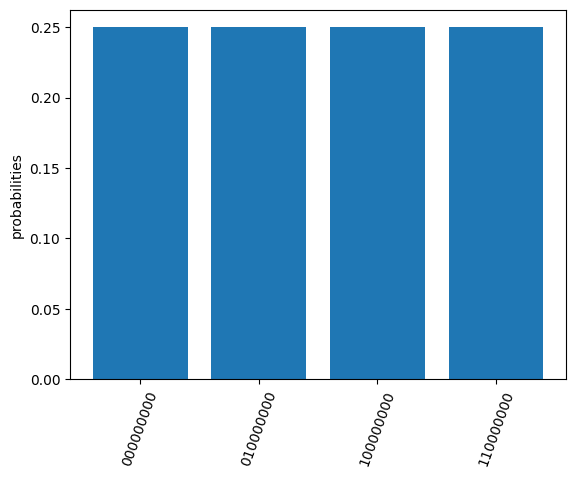

In [3]:
def iqft(qc,n): #inverse quantum Fourier transform, apply the adjoint operator in the original quantum Fourier transform circuit in reverse order.
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1) #swap before rotate
    for i in range(n):
        for k in range(i):
            qc.cp(n-k-1,n-1-i,-np.pi*(2**(k-i))) #in reverse order
        qc.h(n-i-1)
    return qc

def mix(qc,n):
    for qubit in range(n):
        qc.h(qubit)##mix into the uniform superposition state
    return qc

def controlledu(qc, a=7):
    for help_qubit in range(9):
        ctrl=8-help_qubit
        for iteration in range(2 ** help_qubit):
            if a in [2, 13]:
                qc.fredkin(ctrl, 9, 10)
                qc.fredkin(ctrl, 10, 11)
                qc.fredkin(ctrl, 11, 12)
            if a in [7, 8]:
                qc.fredkin(ctrl, 11, 12)
                qc.fredkin(ctrl, 10, 11)
                qc.fredkin(ctrl, 9, 10)
            if a in [4, 11]:
                qc.fredkin(ctrl, 9, 11)
                qc.fredkin(ctrl, 10, 12)
            if a in [7, 11, 13]:
                for q in range(4):
                    qc.cx(ctrl, 9 + q)

N = 15
a = 7
x = 7
n = 13
# pe_test()
#controlledu_test()
qpe = QuantumCircuit(n)
qpe.x(n - 1)  # prepare |1> state in the second register
mix(qpe, n - 4)
controlledu(qpe)# controlled U
iqft(qpe, n - 4)
qpe.measure(list(range(n - 4)))
simu_res = simulate(qpe, output='probabilities')
simu_res.plot_probabilities(full=False)
plt.show()